# TP de Synthèse : Intelligence Artificielle avec Python

L'objectif de ce TP est de faire une synthèse de toutes les notions que vous avez vu sur l'ensemble du cours IA & Python.

À partir d'un jeu de donnée imposé, vous allez devoir proposer une analyse détaillée, et produire des modèles prédictifs avec les meilleures performances possibles.

## À votre disposition :
- Un fichier `Hotel Reservations.csv` contenant les données à analyser, avec pour chaque donnée la valeur de la classe à prédire
- Un fichier `Donnees_Test.csv` de test, comprenant des données sans la valeur de la classe
- Ce notebook, contenant toutes vos instructions, ainsi qu'une description du _Dataset_

## Méthode de travail :
Ce travail peut-être effectué seul, ou en groupe de 2 personnes.

## Rendus attendus :
- Un notebook comprenant votre analyse détaillé du _Dataset_, et la construction de vos modèles prédictifs
- Un fichier CSV, avec sur chaque ligne votre prédiction de classe pour la ligne correspondante dans le fichier de test (`Donnees_Test.csv`).<br/>Ce fichier doit être nommé `NOM_Prénom_.csv` ou `NOM1_NOM2.csv` (si binôme), et ne contient qu'une info par ligne : soit `Canceled`, soit `Not_canceled`.

## Évaluation :
- Lorsque tous les groupes auront rendu leur fichier csv, le formatteur fera tourner un script, pour identifier le groupe ayant produit le modèle avec le meilleur résultat sur le jeu de test.
- Vous devrez fournir vos notebook à un autre groupe de la classe, et relire le notebook d'un autre groupe, pour lui faire un retour sur la qualité de l'analyse de ses données.

## Description des données

Les données à votre disposition décrivent les informations des clients de réservations de chambres d'hôtels.

L'objectif est de détermine, pour chaque client, s'il risque d'annuler sa réservation.

Vous avez à votre disposition les attributs suivants :

- `Booking_ID`: identifiant unique de chaque réservation
- `no_of_adults`: nombre d'adultes dans la réservation
- `no_of_children`: nombre d'enfants dans la réservation
- `no_of_weekend_nights`: nombre de nuits en weekend (samedi ou dimanche) incluses dans la réservation
- `no_of_week_nights`: nombre de nuits de semaine (lundi au vendredi) incluses dans la réservation
- `type_of_meal_plan`: choix de formule repas
- `required_car_parking_space` : indique une réservation de place de parking (0 : non, 1 : oui)
- `room_type_reserved`: type de chambre réservé
- `lead_time` : nombre de jours entre la date de réservation et la date d'arrivée
- `arrival_year` : année de la date d'arrivée
- `arrival_month`: mois de la date d'arrivée
- `arrival_date`: jour de la date d'arrivée
- `market_segment_type`: désignation du segment marketing
- `repeated_guest` : indique s'il s'agit d'un client fréquent (0 : non, 1 : oui)
- `no_of_previous_cancellations` : nombre d'annulation déjà faite par ce client sur d'autres réservations
- `no_of_previous_bookings_not_canceled`: nombre de réservations déjà faites sans annulations
- `avg_price_per_room`: prix moyen journalier de la réservation (en euros)
- `no_of_special_requests`: nombre total des requêtes spécifiques du client (étage, vue, ...)
- `booking_status` : indique si la réservation a été annulée ou non (=classe à prédire !)

In [ ]:
%%sql


## Les questions auxquelles vous devez répondre

Nous vous proposons ci-après une liste de questions à vous poser.
Il ne s'agit pas d'une obligation, ni d'une liste exhaustive, mais elles doivent vous permettre de vérifier un certains nombre de points de votre analyse.

_N.B. : N'oubliez pas de vous appuyer dès que possible sur des représentations graphiques parlantes, et sur des statistiques précises._

1. Combien d'attributs ?
1. Combien de données ?
1. Combien de classes ?
1. Quelle répartition entre les classes ?
1. Valeurs manquantes ?
1. Quelle répartition des valeurs sur chaque attribut ?
1. Quelle caractérisation de chaque attribut ?
1. Corrélation entre certains attributs ?
1. Nettoyage des données nécessaire ?
1. Transformation des données ?
1. Normalisation ?
1. Quelle(s) forme(s) d'apprentissage ?
1. Quels algorithmes privilégier ?
1. Quelles performances privilégier ?
1. Comment améliorer les performances initiales ?
1. Comment choisir les paramètres des algorithmes ?

## Considérations supplémentaires

Il vous est également demandé de réfléchir aux questions suivantes :
1. Quelle valeur ajoutée pourrait apporter vos analyses et votre algorithme aux hôtels ?
1. À quels aspects législatisf devriez-vous prendre garde ?
1. Votre algorithme pourrait-il être utilisé à mauvais escient ?

# Réalisation:


Import:

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from sklearn.preprocessing import OneHotEncoder

Récupération des données:

In [68]:
data_reservations = pd.read_csv("Hotel Reservations.csv")
data_reservations

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,INN29995,2,0,0,2,Meal Plan 1,0,Room_Type 1,322,2018,12,9,Offline,0,0,0,52.00,0,Not_Canceled
29995,INN29996,2,0,0,3,Meal Plan 1,0,Room_Type 1,91,2018,5,11,Offline,0,0,0,75.00,0,Not_Canceled
29996,INN29997,2,0,0,2,Meal Plan 1,0,Room_Type 1,24,2018,4,21,Online,0,0,0,117.00,0,Canceled
29997,INN29998,1,0,0,2,Meal Plan 1,0,Room_Type 1,266,2018,12,2,Offline,0,0,0,75.00,0,Not_Canceled


1) Combien d'attribut ?


In [3]:
print(f'Il y a {data_reservations.shape[1]} colonnes.')
data_reservations.info()

Il y a 19 colonnes.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29999 non-null  object 
 1   no_of_adults                          29999 non-null  int64  
 2   no_of_children                        29999 non-null  int64  
 3   no_of_weekend_nights                  29999 non-null  int64  
 4   no_of_week_nights                     29999 non-null  int64  
 5   type_of_meal_plan                     29999 non-null  object 
 6   required_car_parking_space            29999 non-null  int64  
 7   room_type_reserved                    29999 non-null  object 
 8   lead_time                             29999 non-null  int64  
 9   arrival_year                          29999 non-null  int64  
 10  arrival_month                         29999 non-null  int64  


2) Combien de données ?

In [4]:
print(f'Il y a {data_reservations.shape[0]} lignes.')

Il y a 29999 lignes.


3. Combien de classes ?

In [5]:
data_reservations_objects = data_reservations.select_dtypes(include='object')
print(f'Il y a {data_reservations_objects.shape[1]} classes')


Il y a 5 classes


## NETTOYAGE DES DONNEES

In [72]:
# Agrégation des données
data_reservations['nb_persons'] = data_reservations['no_of_children'] + data_reservations['no_of_adults']
data_reservations['nb_nights'] = data_reservations['no_of_week_nights'] + data_reservations['no_of_weekend_nights']


#one hots
enc = OneHotEncoder(drop='if_binary')

one_hot = np.array(enc.fit_transform(data_reservations[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']]).toarray())
one_hot_label = enc.get_feature_names_out(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'])

df = pd.DataFrame(data=one_hot, columns=one_hot_label)
data_reservations = data_reservations.join(df)
data_reservations = data_reservations.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'], axis=1)


# Suppression des données inutiles
clean_data_reservations = data_reservations.drop(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_week_nights', 'no_of_weekend_nights'], axis=1)



In [38]:
clean_data_reservations.info()
print(f'Il y a {clean_data_reservations.shape[1]} colonnes.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   required_car_parking_space            29999 non-null  int64  
 1   lead_time                             29999 non-null  int64  
 2   arrival_year                          29999 non-null  int64  
 3   arrival_month                         29999 non-null  int64  
 4   arrival_date                          29999 non-null  int64  
 5   repeated_guest                        29999 non-null  int64  
 6   no_of_previous_cancellations          29999 non-null  int64  
 7   no_of_previous_bookings_not_canceled  29999 non-null  int64  
 8   avg_price_per_room                    29999 non-null  float64
 9   no_of_special_requests                29999 non-null  int64  
 10  nb_persons                            29999 non-null  int64  
 11  nb_nights      

5. Valeurs manquantes

In [7]:
data_reservations.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Aucune valeur manquante

6) Quelle répartition des valeurs sur chaque attribut ?

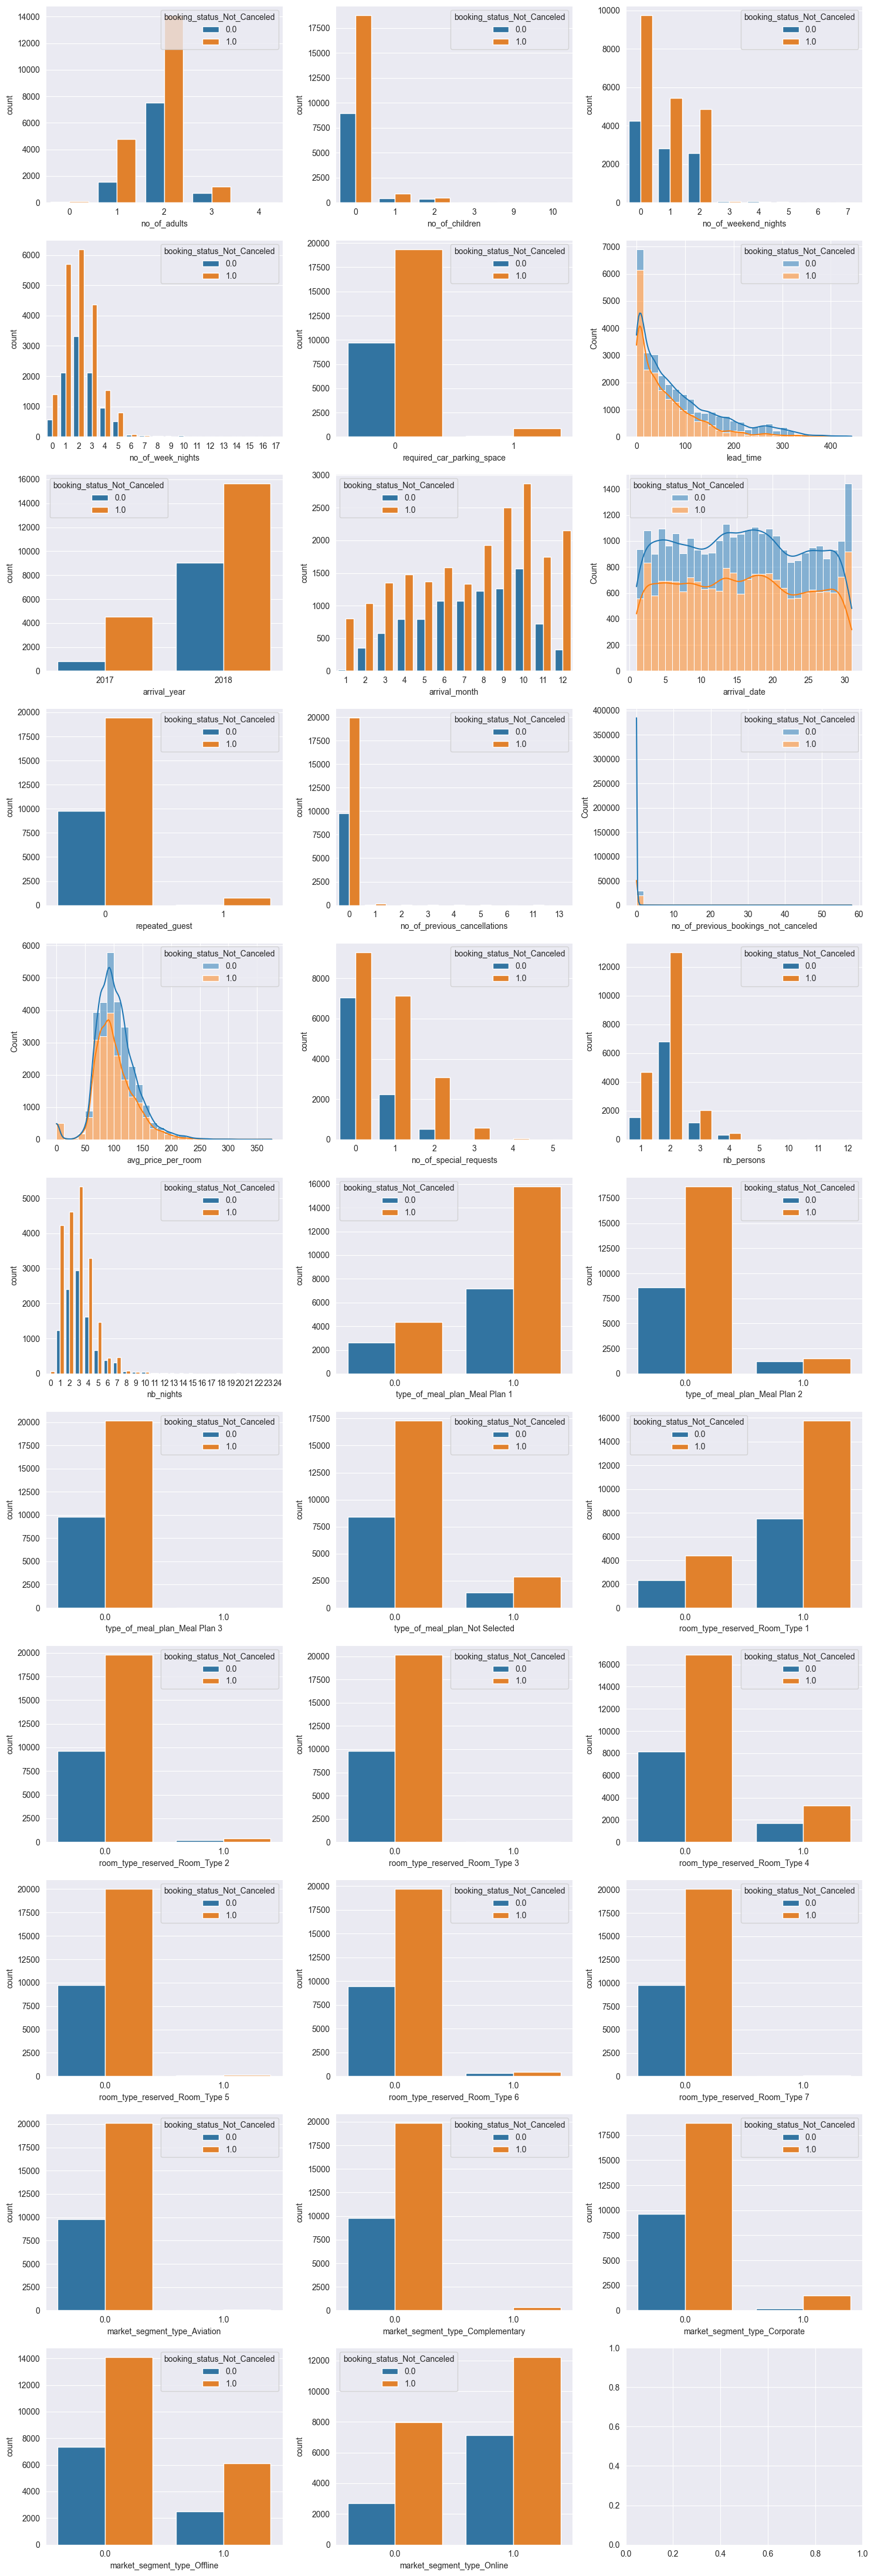

In [65]:
# for col in data_reservations.columns:
#     plt.figure(figsize=(6,4))
#     sns.histplot(data_reservations[col], kde=True)  # kde=True si vous voulez la courbe de densité
#     plt.title(f'Histogramme de {col}')
#     plt.show()

data_cleaned = data_reservations.drop(['Booking_ID'], axis=1)

n_cols = 3
n_rows = (len(data_cleaned.columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(data_cleaned.columns):
    if col == 'booking_status_Not_Canceled':
        continue  # On ne veut pas tracer la colonne de statut contre elle-même

    if data_cleaned[col].dtype.name == 'category' or data_cleaned[col].nunique() < 30:
        sns.countplot(x=col, hue='booking_status_Not_Canceled', data=data_cleaned, ax=axes[i])
    else:
        sns.histplot(data=data_cleaned, x=col, hue='booking_status_Not_Canceled', bins=30, kde=True, ax=axes[i], multiple="stack")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Correlation type de chambre/annulation

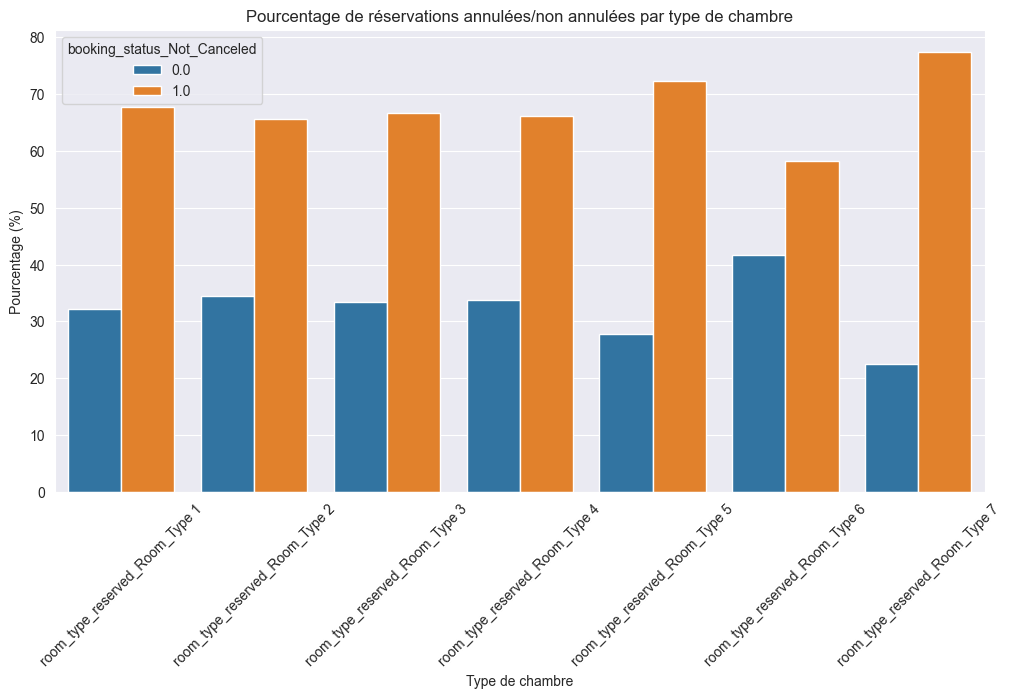

In [84]:
data_cleaned_chambre = data_reservations[
    [
        "room_type_reserved_Room_Type 1",
        "room_type_reserved_Room_Type 2",
        "room_type_reserved_Room_Type 3",
        "room_type_reserved_Room_Type 4",
        "room_type_reserved_Room_Type 5",
        "room_type_reserved_Room_Type 6",
        "room_type_reserved_Room_Type 7",
        "booking_status_Not_Canceled"
    ]
]

# Transformer le dataframe pour avoir une colonne 'type_de_chambre'
melted = data_cleaned_chambre.melt(
    id_vars='booking_status_Not_Canceled',
    var_name='type_de_chambre',
    value_name='reserved'
)

# Garder uniquement les lignes où la chambre a été réservée (reserved == 1)
melted = melted[melted['reserved'] == 1]

# Calculer le pourcentage d'annulations / non annulations par type de chambre
percent_df = (
    melted.groupby(['type_de_chambre', 'booking_status_Not_Canceled'])
    .size()
    .reset_index(name='count')
)
percent_df['percentage'] = percent_df.groupby('type_de_chambre')['count'].transform(lambda x: x / x.sum() * 100)
# Tracer le graphique
plt.figure(figsize=(12,6))
sns.barplot(
    data=percent_df,
    x='type_de_chambre',
    y='percentage',
    hue='booking_status_Not_Canceled'
)
plt.ylabel("Pourcentage (%)")
plt.xlabel("Type de chambre")
plt.title("Pourcentage de réservations annulées/non annulées par type de chambre")
plt.xticks(rotation=45)
plt.show()

Interpretation:
- Room type 7 est moins annulée
- Room type 6 est plus annulée
- Sinon pas de diff

7. Quelle caractérisation de chaque attribut ?

In [14]:
# Exemple : df est ton DataFrame
data_reservations
print("BookinID: Données continues, qualitatives")
print("no_of_adults: Données continues, quantitatives")
print("no_of_children: Données continues, quantitatives")
print("no_of_weekend_nights: Données continues, quantitatives")
print("no_of_week_nights: Données continues, quantitatives")
print("type_of_meal_plan: Données finies, qualitatives")
print("required_car_parking_space: Données finies, qualitatives")
print("room_type_reserved: Données finies, qualitatives")
print("lead_time: Données continues, quantitatives")
print("arrival_year: Données continues, quantitatives")
print("arrival_month: Données continues, quantitatives")
print("arrival_date: Données continues, quantitatives")
print("market_segment_type: Données finies, qualitatives")
print("repeated_guest: Données finies, qualitatives")
print("no_of_previous_cancelations: Données finies, quantitatives")
print("no_of_bookings_not_canceled: Données continues, quantitatives")
print("avg_price_per_room: Données continues, quantitatives")
print("nb_of_special_request: Données continues, quantitatives")
print("booking_status: Données finies, qualitatives")

BookinID: Données continues, qualitatives
no_of_adults: Données continues, quantitatives
no_of_children: Données continues, quantitatives
no_of_weekend_nights: Données continues, quantitatives
no_of_week_nights: Données continues, quantitatives
type_of_meal_plan: Données finies, qualitatives
required_car_parking_space: Données finies, qualitatives
room_type_reserved: Données finies, qualitatives
lead_time: Données continues, quantitatives
arrival_year: Données continues, quantitatives
arrival_month: Données continues, quantitatives
arrival_date: Données continues, quantitatives
market_segment_type: Données finies, qualitatives
repeated_guest: Données finies, qualitatives
no_of_previous_cancelations: Données finies, quantitatives
no_of_bookings_not_canceled: Données continues, quantitatives
avg_price_per_room: Données continues, quantitatives
nb_of_special_request: Données continues, quantitatives
booking_status: Données finies, qualitatives


8) Corrélation entre certains attributs ?

<Axes: >

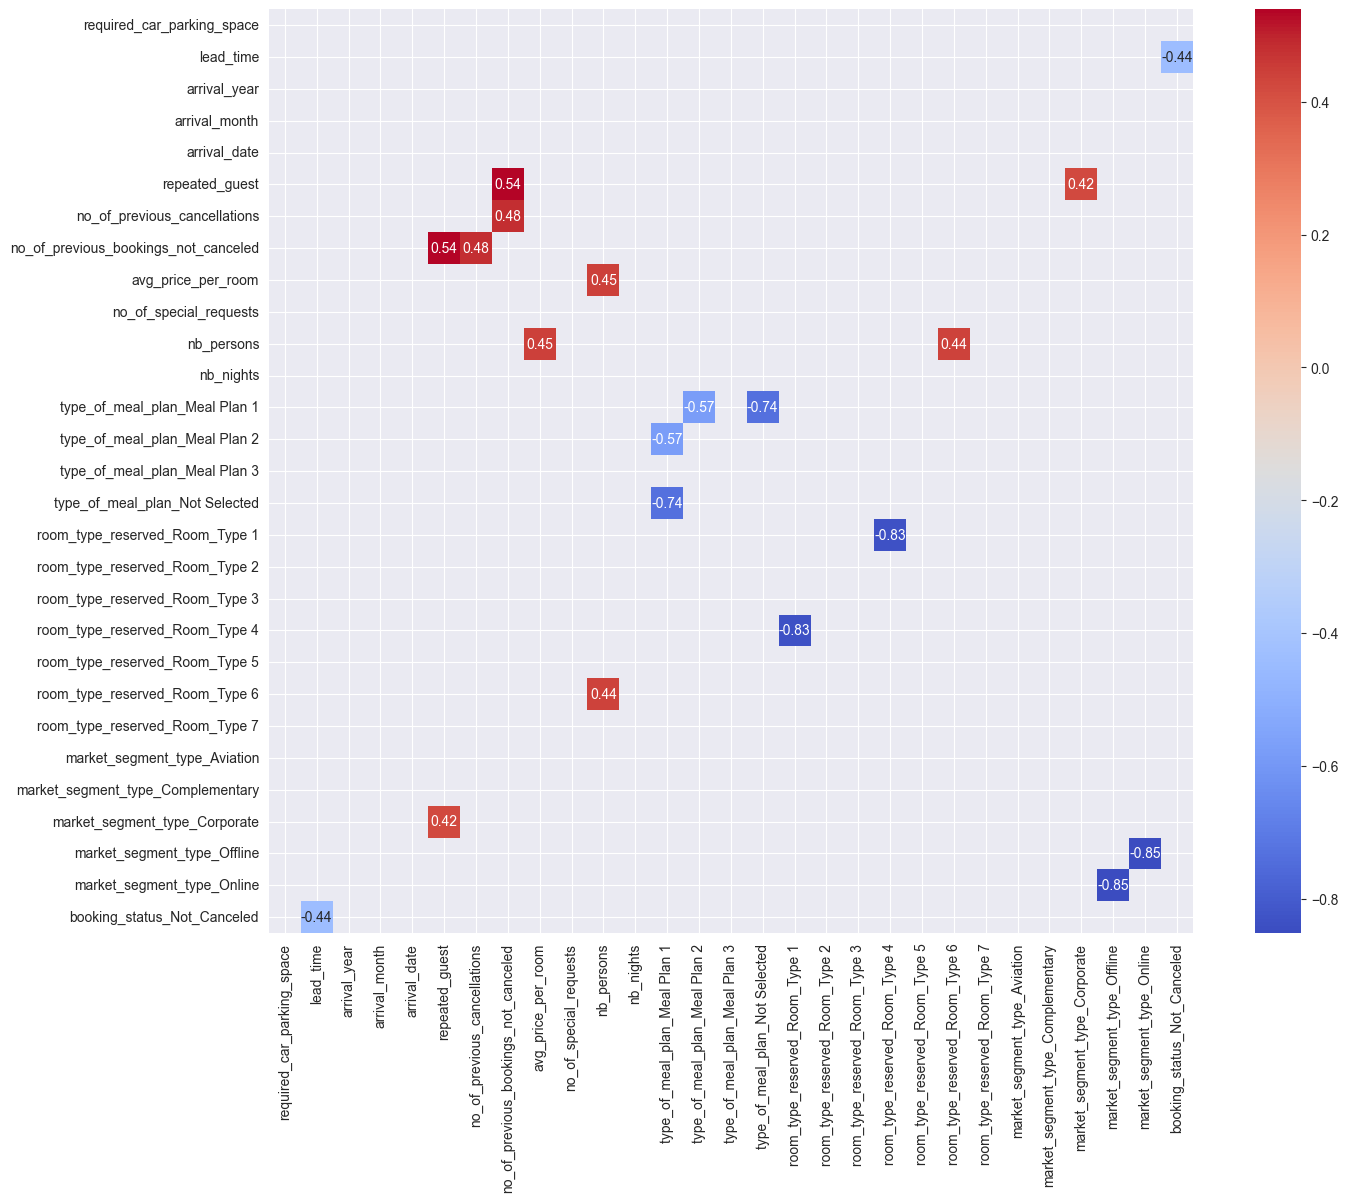

In [50]:
plt.figure(figsize=(16,12))

corr = clean_data_reservations.corr()

#Aucune corrélation parfaite, on retire 1. On estime que haut dessus de 0.5 ou en dessous de -0.5 on a des correlation
corr_filtered = corr.mask((corr < 0.4) & (corr > -0.4) | (corr == 1))
# corr_filtered = corr

sns.heatmap(
    corr_filtered,
    annot=True,           # Affiche les valeurs
    fmt=".2f",            # Formate les nombres
    cmap='coolwarm',      # Couleur
    cbar=True,            # Barre de couleur
    square=True,          # Carré pour chaque case
)

### Interpretation des correlations

Les market segment type corporate ont tendances à etre des clients réguliers
Les clients réguliers ont tendances à ne pas annuler

_Penser a montrer date resa et en hue les annulations_

# Correlation temps / annulation

## Mois / annulation

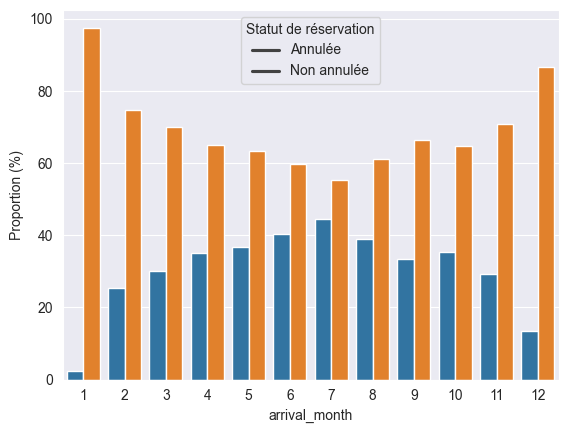

In [60]:
# sns.histplot(clean_data_reservations, x='arrival_month', hue='booking_status_Not_Canceled',multiple="dodge")
#
# plt.legend(title='Statut de réservation', labels=['Annulée', 'Non annulée'])

df = clean_data_reservations.copy()
df_grouped = df.groupby(['arrival_month', 'booking_status_Not_Canceled']).size().reset_index(name='count')

df_total = df_grouped.groupby('arrival_month')['count'].transform('sum')
df_grouped['proportion'] = df_grouped['count'] / df_total * 100

sns.barplot(
    data=df_grouped,
    x='arrival_month',
    y='proportion',
    hue='booking_status_Not_Canceled'
)

plt.ylabel('Proportion (%)')
plt.legend(title='Statut de réservation', labels=['Annulée', 'Non annulée'])
plt.show()

## Jour / annulation


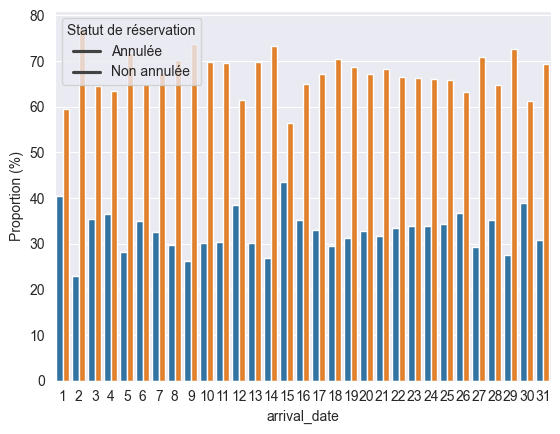

In [85]:
# sns.histplot(clean_data_reservations, x='arrival_month', hue='booking_status_Not_Canceled',multiple="dodge")
#
# plt.legend(title='Statut de réservation', labels=['Annulée', 'Non annulée'])

df = clean_data_reservations.copy()
df_grouped = df.groupby(['arrival_date', 'booking_status_Not_Canceled']).size().reset_index(name='count')

df_total = df_grouped.groupby('arrival_date')['count'].transform('sum')
df_grouped['proportion'] = df_grouped['count'] / df_total * 100

sns.barplot(
    data=df_grouped,
    x='arrival_date',
    y='proportion',
    hue='booking_status_Not_Canceled'
)

plt.ylabel('Proportion (%)')
plt.legend(title='Statut de réservation', labels=['Annulée', 'Non annulée'])
plt.show()

Trop aléatoire pour en tirer des parametres

1. Corrélation entre certains attributs ?
1. Nettoyage des données nécessaire ?
1. Transformation des données ?
1. Normalisation ?
1. Quelle(s) forme(s) d'apprentissage ?
1. Quels algorithmes privilégier ?
1. Quelles performances privilégier ?
1. Comment améliorer les performances initiales ?
1. Comment choisir les paramètres des algorithmes ?